In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('winequality-red+(7).csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


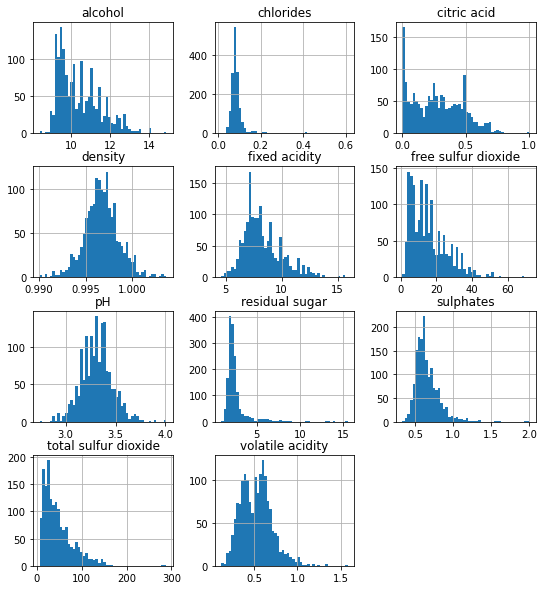

In [26]:
#plt.figure(figsize=(6, 4))
data.iloc[: ,:-1].hist(bins=50, figsize=(9, 10))
plt.show()

In [31]:
print(data.dtypes, '\n\n', data.shape)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 

 (1599, 12)


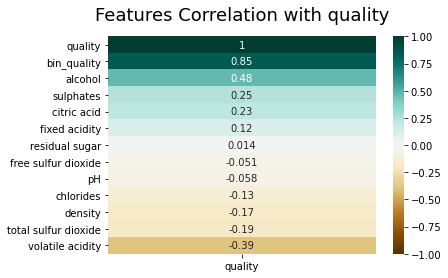

In [82]:
import seaborn as sns
#plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['quality']].sort_values(by='quality', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
#
heatmap.set_title('Features Correlation with quality', fontdict={'fontsize':18}, pad=16);

In [43]:
sns.__version__

'0.11.0'

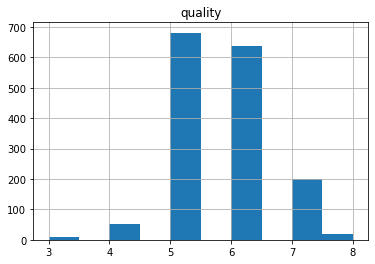

In [81]:
data[['quality']].hist()
plt.show()

### Feature Engineering:

In [52]:
data['bin_quality'] = data['quality'].apply(lambda x: 0 if (x<6) else 1) # Alter,ative: y_class = np.where(y<6, 0, 1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bin_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Feature selection:

In [53]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'bin_quality'],
      dtype='object')

In [55]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
#
X = data[features].values
X[0:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [64]:
y = data['bin_quality'].values
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Data standardization
Data standardization with sklearn.preprocessing.StandardScaler()

In [57]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit(X).transform(X)
X_std

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [62]:
def multi_plot_hist(matrix, Bins):
    fig = plt.figure(figsize=(16, 10))
    for feat_idx in range(matrix.shape[1]):
        ax = fig.add_subplot(3,4, (feat_idx+1))
        h = ax.hist(matrix[:, feat_idx], bins=Bins, color='steelblue', density=True, edgecolor='none')
        ax.set_title(data.columns[feat_idx], fontsize=14)
#

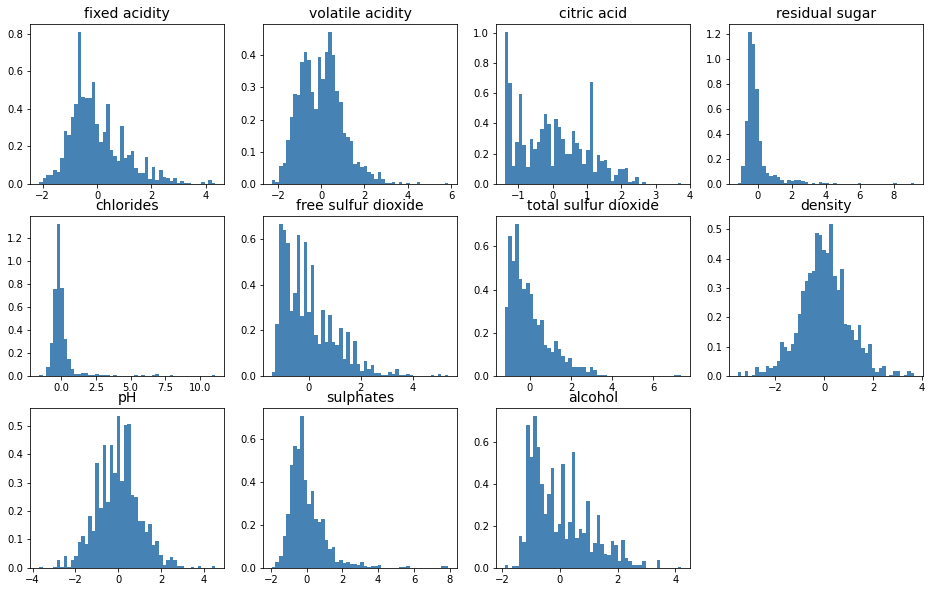

In [63]:
multi_plot_hist(X_std, 50)

### Model Split:

In [65]:
from sklearn.model_selection import train_test_split

In [83]:
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size=.3, random_state=4)

### Model construction:

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

We will use gridsearch for the selection of k

In [84]:
# hyper-param
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17]}

# score metrics
score = 'accuracy'

# GridSearch + KNN model
gs_kn = GridSearchCV(
            KNeighborsClassifier(), # classifier
            param_grid,     # hyper-param
            cv=5,           # folds numbers
            scoring=score   # score metric
)
gs_kn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
             scoring='accuracy')

In [85]:
# Training
gs_kn.fit(X_std_train, y_train)
gs_kn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
             scoring='accuracy')

In [86]:
# Results print:
print("Cross-Validation results :")
for mean, std, params in zip(
        gs_kn.cv_results_['mean_test_score'], # score moyen
        gs_kn.cv_results_['std_test_score'],  # écart-type du score
        gs_kn.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )
#
# Print:
print("Best parameter:")
print(gs_kn.best_params_)

Cross-Validation results :
accuracy = 0.711 (+/-0.039) for {'n_neighbors': 3}
accuracy = 0.706 (+/-0.040) for {'n_neighbors': 5}
accuracy = 0.716 (+/-0.045) for {'n_neighbors': 7}
accuracy = 0.716 (+/-0.037) for {'n_neighbors': 9}
accuracy = 0.721 (+/-0.052) for {'n_neighbors': 11}
accuracy = 0.721 (+/-0.055) for {'n_neighbors': 13}
accuracy = 0.719 (+/-0.061) for {'n_neighbors': 15}
accuracy = 0.727 (+/-0.047) for {'n_neighbors': 17}
Best parameter:
{'n_neighbors': 17}


### Prediction score:

In [88]:
from sklearn.metrics import accuracy_score
y_pred = gs_kn.predict(X_std_test)
print("\n Accuracy on test data : {:.3f}".format(accuracy_score(y_test, y_pred)))


 Accuracy on test data : 0.713


Next we will try to use the Pipeline for a better simplification
____